[[ 3.16555676e-01 -4.94218179e-02]
 [ 7.40882700e-01 -4.81286241e-01]
 [ 8.71726371e-01  5.66561587e-01]
 [ 5.55527878e-01  6.34505704e-01]
 [ 2.03872888e+00  1.38594464e-01]
 [ 1.99136342e+00  4.76786765e-01]
 [ 2.23844286e-01 -1.74253311e-01]
 [ 9.72956748e-01  3.75643110e-01]
 [-9.21303663e-01 -2.04546533e-01]
 [ 4.66706325e-01  8.98184453e-01]
 [ 4.92178040e-01 -2.33323699e-01]
 [-4.22352951e-01  8.42400546e-01]
 [ 3.13586101e-01  1.10484604e+00]
 [ 6.48480819e-01  7.94551589e-01]
 [ 3.15494607e-01 -7.71530823e-02]
 [-9.11878663e-01  3.89938741e-01]
 [ 1.70164131e+00 -1.11381420e-01]
 [ 1.08514533e-01 -1.48143238e-01]
 [-3.09872448e-01  9.01551871e-01]
 [-2.04081648e-01  9.85689076e-01]
 [ 1.72147790e-01 -3.88165099e-02]
 [ 4.66098079e-01 -2.31534875e-01]
 [ 2.71095720e-01 -3.88358372e-01]
 [ 1.99723978e+00  2.84916516e-01]
 [ 6.97504384e-01  7.42149310e-01]
 [ 1.06537953e+00 -5.84415699e-01]
 [ 9.51993824e-01  2.55247449e-01]
 [ 5.68445777e-01 -5.11648354e-01]
 [-5.73269205e-01  7

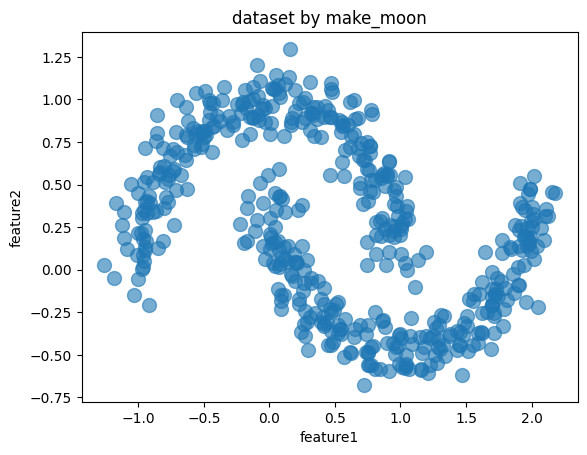

In [17]:
import numpy as np
import pandas as pd
from sklearn import datasets
%matplotlib inline

X,_ = datasets.make_moons(500,noise = 0.1,random_state=1)
df = pd.DataFrame(X,columns = ['feature1','feature2'])

df.plot.scatter('feature1','feature2', s = 100,alpha = 0.6, title = 'dataset by make_moon')
print(X)

      lon    lat
0  139.67  35.31
1 -117.12  32.66
2  129.54  32.83
3  129.55  33.94
4 -157.98  21.18
5  139.53  34.74
6  144.70  13.47
7  135.32  35.61
8  139.77  35.09


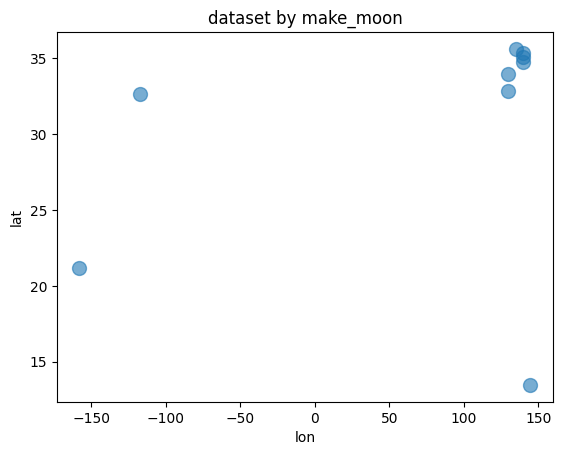

In [18]:
df = pd.read_csv('./data.csv')
df.plot.scatter('lon','lat', s = 100,alpha = 0.6, title = 'dataset by make_moon')
print(df)

[0 1 2 3 4 0 5 6 0] [0 1 2 3 4 5 6 7 8]       lon    lat
0  139.67  35.31
1 -117.12  32.66
2  129.54  32.83
3  129.55  33.94
4 -157.98  21.18
5  139.53  34.74
6  144.70  13.47
7  135.32  35.61
8  139.77  35.09


<Axes: title={'center': 'DBSCAN cluster result'}, xlabel='lon', ylabel='lat'>

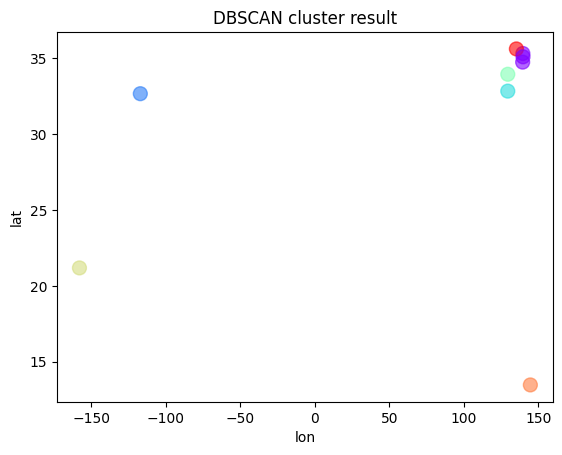

In [33]:
from sklearn.cluster import dbscan

df = pd.read_csv('./data.csv')
# eps为邻域半径，min_samples为最少点数目
core_samples,cluster_ids = dbscan(df, eps = 1, min_samples=1) 

# cluster_ids中-1表示对应的点为噪声点
print(cluster_ids, core_samples, df)

df = pd.DataFrame(np.c_[df,cluster_ids],columns = ['lon','lat','cluster_id'])
df['cluster_id'] = df['cluster_id'].astype('i2')

df.plot.scatter('lon','lat', s = 100,
    c = list(df['cluster_id']),cmap = 'rainbow',colorbar = False,
    alpha = 0.6,title = 'DBSCAN cluster result')